In [1]:
import pandas as pd
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


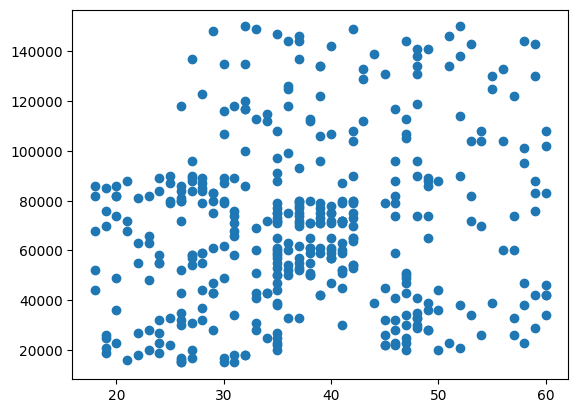

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df["Age"],df["EstimatedSalary"])
plt.show()

In [3]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [4]:
p_df = df[df['Purchased'] == 1]
np_df = df[df['Purchased'] == 0] 

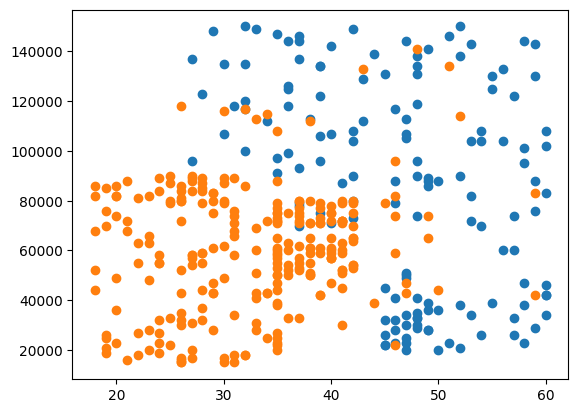

In [5]:
plt.scatter(p_df['Age'],p_df['EstimatedSalary'])
plt.scatter(np_df['Age'],np_df['EstimatedSalary'])
plt.show()

In [6]:
x = df.iloc[:,2:4].values
y = df.iloc[:,4].values

In [7]:
#spliting data into trian and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42) 

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(300, 2)
(100, 2)


In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train,y_train)

In [11]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [12]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test)

array([[62, 12],
       [ 1, 25]], dtype=int64)

tp fp

fn tn

if a dataset is imbalanced then accuracy is not a perfect measure then

consider recall or presicion

In [14]:
#accuracy = (62+25)/(62+25+1+12)
(62+25)/(62+25+1+12)

0.87

In [15]:
accuracy_score(y_pred,y_test)

0.87

In [16]:
op = [[19,45000]]
op = scaler.transform(op)
clf.predict(op)

array([0], dtype=int64)

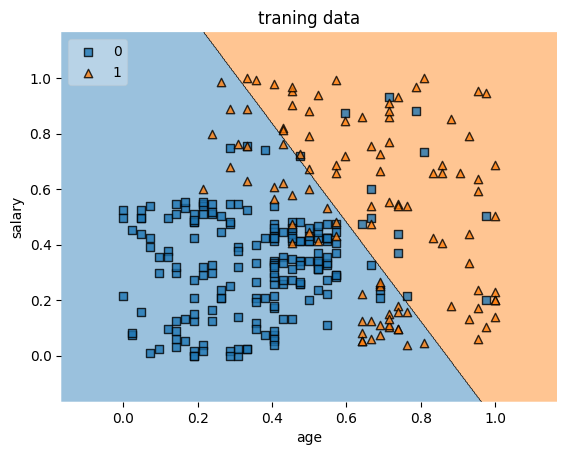

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train,clf,legend=2,zoom_factor=6)
plt.xlabel('age')
plt.ylabel('salary')
plt.title('traning data')
plt.show()

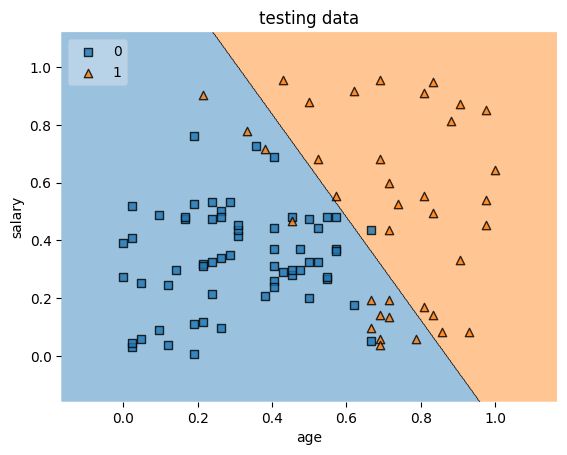

In [18]:
plot_decision_regions(x_test,y_test,clf,legend=2 ,zoom_factor=6)
plt.xlabel('age')
plt.ylabel('salary')
plt.title('testing data')
plt.show()

In [19]:
clf.predict_proba(x_test)

array([[0.69253784, 0.30746216],
       [0.12791454, 0.87208546],
       [0.91620662, 0.08379338],
       [0.29978997, 0.70021003],
       [0.93028939, 0.06971061],
       [0.86047696, 0.13952304],
       [0.27879648, 0.72120352],
       [0.82096332, 0.17903668],
       [0.61103403, 0.38896597],
       [0.60416961, 0.39583039],
       [0.76913597, 0.23086403],
       [0.44976191, 0.55023809],
       [0.94643195, 0.05356805],
       [0.97568027, 0.02431973],
       [0.79144976, 0.20855024],
       [0.59103782, 0.40896218],
       [0.45814466, 0.54185534],
       [0.450667  , 0.549333  ],
       [0.76925761, 0.23074239],
       [0.26092699, 0.73907301],
       [0.96742635, 0.03257365],
       [0.8293682 , 0.1706318 ],
       [0.66397927, 0.33602073],
       [0.15624312, 0.84375688],
       [0.97978777, 0.02021223],
       [0.55849055, 0.44150945],
       [0.53283437, 0.46716563],
       [0.77091638, 0.22908362],
       [0.10045946, 0.89954054],
       [0.97900397, 0.02099603],
       [0.

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test)

array([[62, 12],
       [ 1, 25]], dtype=int64)

In [21]:
#presion is the ratio of the true positive and all positives
# p_1 = tp/(tp +fp)
# p_0 = tn/(tn+fn)

In [22]:
from sklearn.metrics import precision_score
p_p = precision_score(y_pred,y_test)
p_p

0.6756756756756757

In [23]:
25/(25+12)

0.6756756756756757

In [24]:
p_n = precision_score(y_pred,y_test,pos_label=0)
p_n


0.9841269841269841

In [25]:
62/(62+1)

0.9841269841269841

In [26]:
#recall : dealing with sensitive data 
# r_p = tp/(tp+np)

In [27]:
from sklearn.metrics import recall_score
r_p = recall_score(y_pred,y_test)
r_p

0.9615384615384616

In [28]:
r_n = recall_score(y_pred,y_test,pos_label=0)
r_n

0.8378378378378378